# Caso Práctico VII - Análisis de nuevas vías de negocio para empresa VALTEL

In [1]:
## Metodología CRISP-DM para predicción de precio de vehículos del archivo csv 'Coches_Segunda_Mano.csv'
# Importamos librerías necesarias
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

**Exploración inicial del dataset**

In [2]:
# Cargamos los datos del archivo csv
df = pd.read_csv("Coches_Segunda_Mano.csv")
# Observamos el tamaño del conjunto de datos
print("Tamaño del conjunto de datos: ", df.shape)
# Mostramos los primeros 10 registros
print("Primeros 10 registros: ", df.head(10))
# Mostramos los últimos 10 registros 
print("Ultimos 10 registros: ", df.tail(10))
# Mostramos el tipo de dato de los primeros 10 registros
print("Tipo de dato: ", df.iloc[:10].dtypes)

Tamaño del conjunto de datos:  (11914, 16)
Primeros 10 registros:    Marca      Modelo  year                  Combustible     CV  Cilindros  \
0   BMW  1 Series M  2011  premium unleaded (required)  335.0        6.0   
1   BMW    1 Series  2011  premium unleaded (required)  300.0        6.0   
2   BMW    1 Series  2011  premium unleaded (required)  300.0        6.0   
3   BMW    1 Series  2011  premium unleaded (required)  230.0        6.0   
4   BMW    1 Series  2011  premium unleaded (required)  230.0        6.0   
5   BMW    1 Series  2012  premium unleaded (required)  230.0        6.0   
6   BMW    1 Series  2012  premium unleaded (required)  300.0        6.0   
7   BMW    1 Series  2012  premium unleaded (required)  300.0        6.0   
8   BMW    1 Series  2012  premium unleaded (required)  230.0        6.0   
9   BMW    1 Series  2013  premium unleaded (required)  230.0        6.0   

  Transmision          Traccion  Puertas  \
0      MANUAL  rear wheel drive      2.0   
1      M

**Análisis Univariante**

Variable: Marca, Número de clases: 48


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


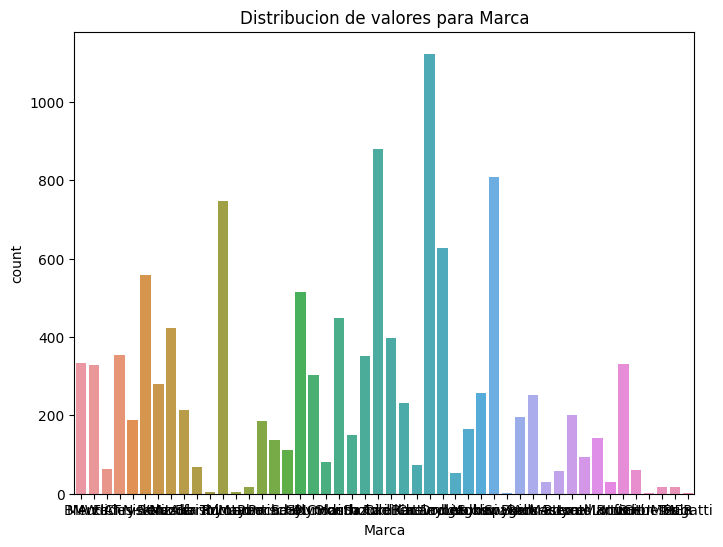

Variable: Modelo, Número de clases: 915


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


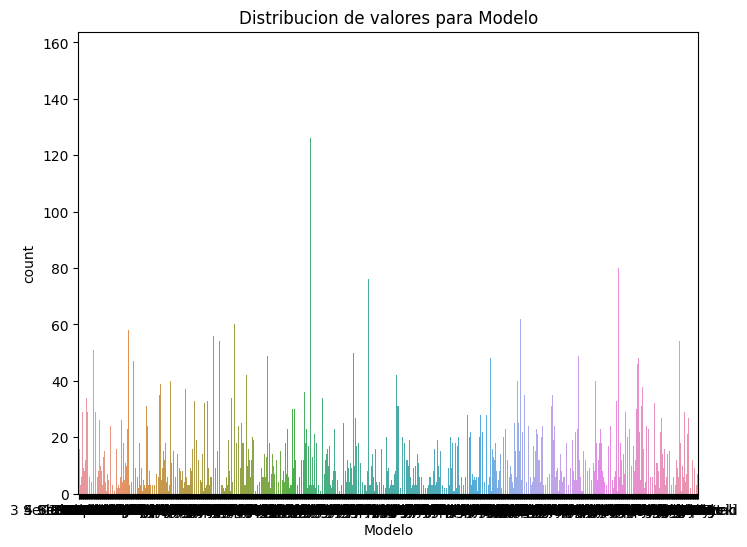

Variable: Combustible, Número de clases: 11


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


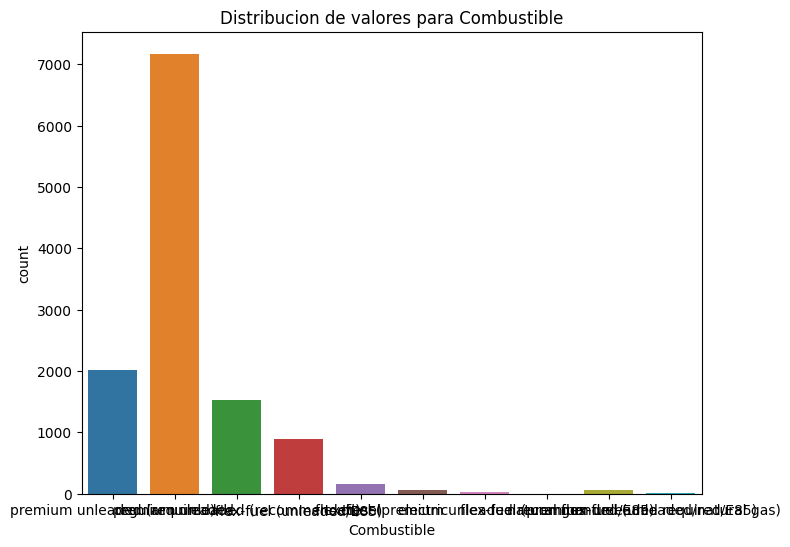

Variable: Transmision, Número de clases: 5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


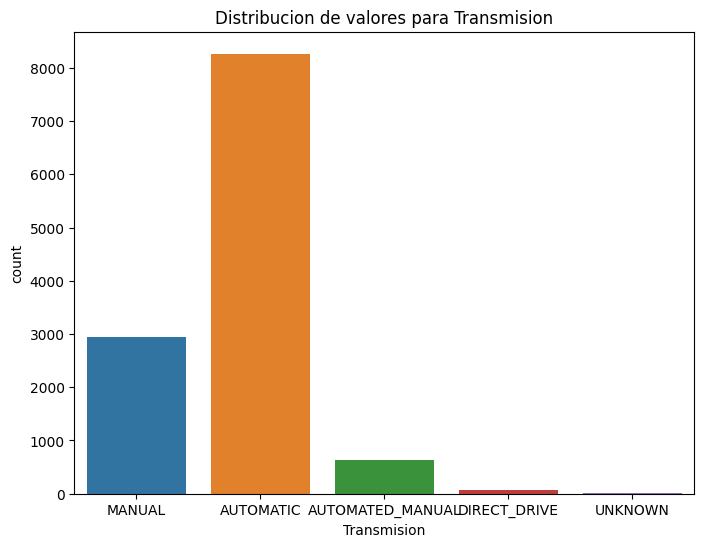

Variable: Traccion, Número de clases: 4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


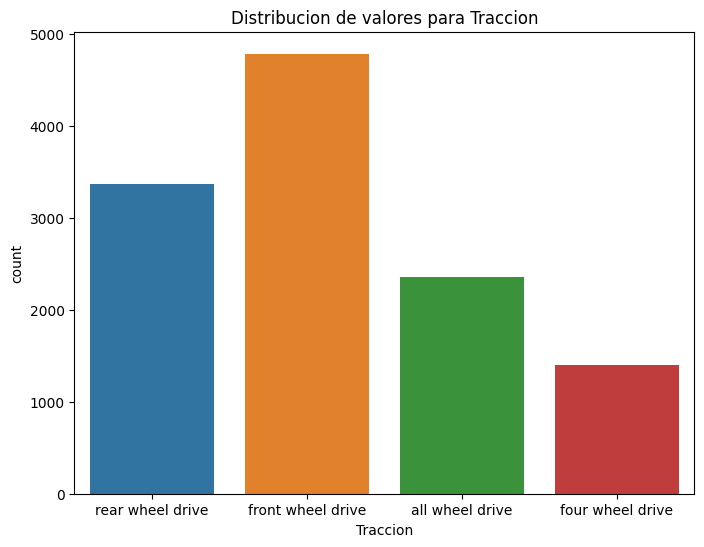

Variable: Mercado, Número de clases: 72


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


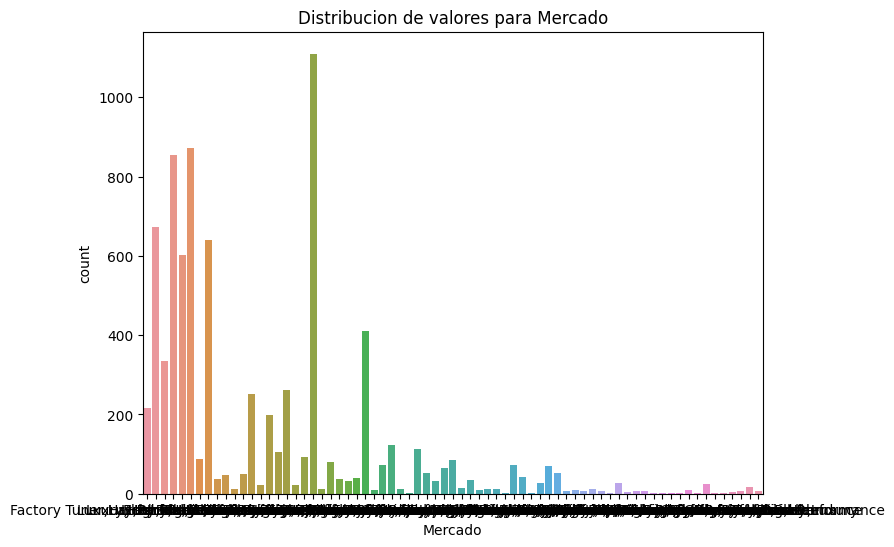

Variable: tipo, Número de clases: 3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


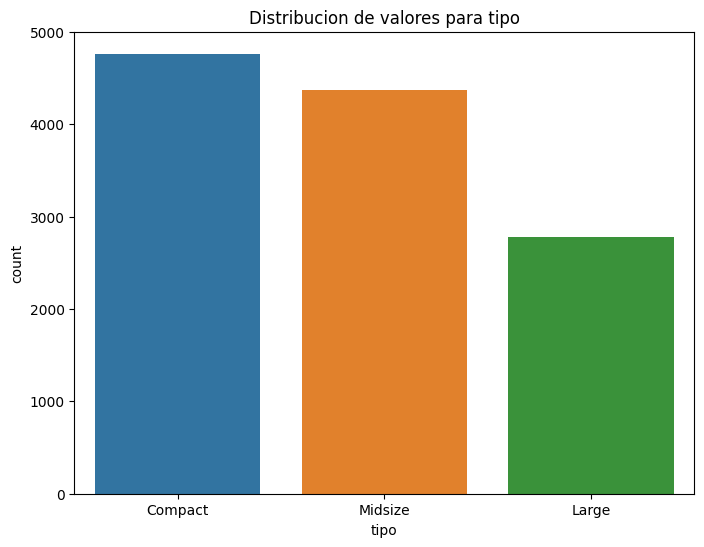

Variable: Estilo, Número de clases: 16


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


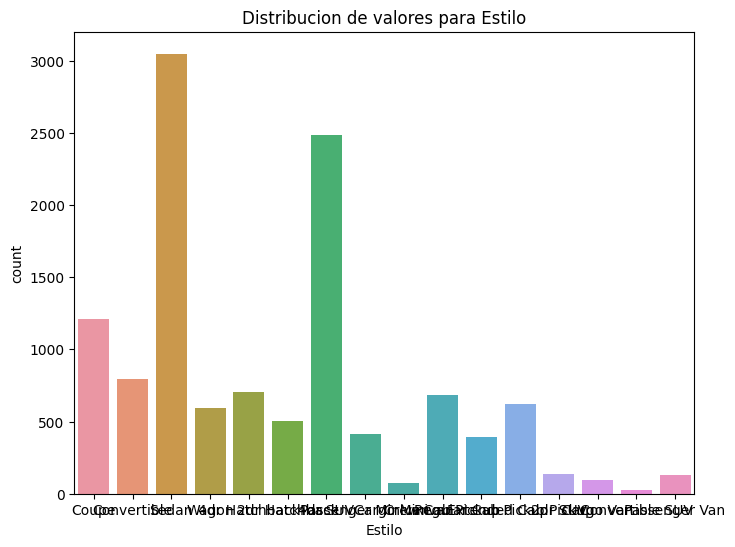

Variable: year
Media: 2010.384337753903, Mínimo: 1990, Máximo: 2017, Mediana: 2015.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Futur

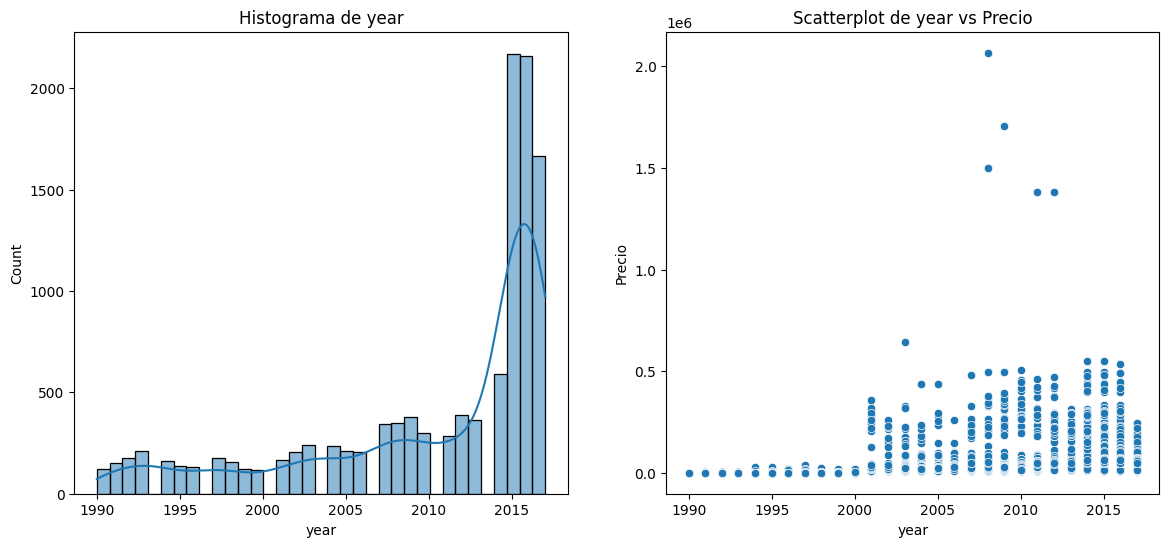

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Variable: CV
Media: 249.38607007176023, Mínimo: 55.0, Máximo: 1001.0, Mediana: 227.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


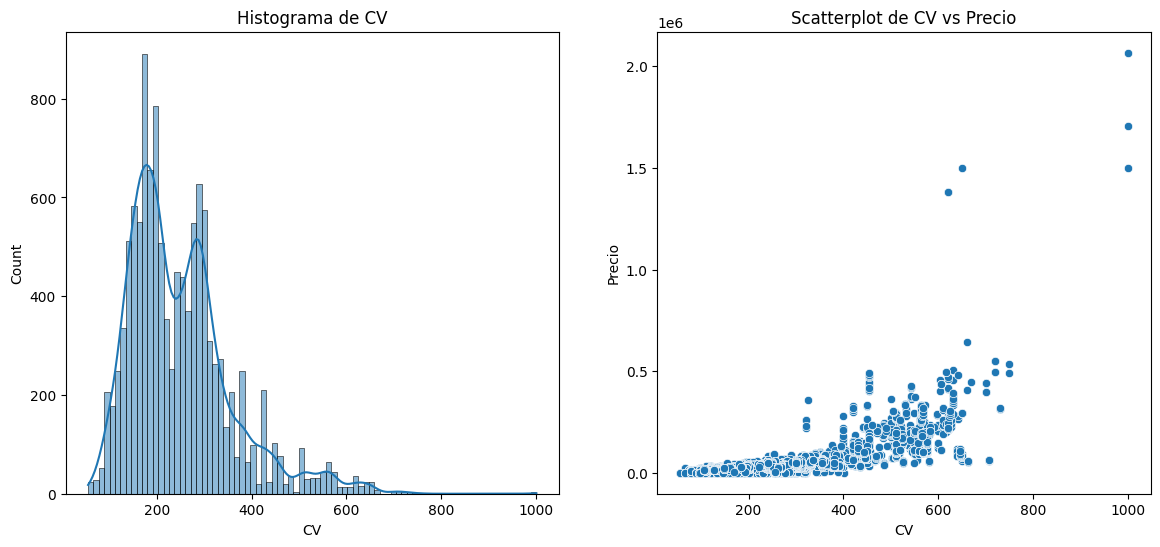

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Variable: Cilindros
Media: 5.628828677213059, Mínimo: 0.0, Máximo: 16.0, Mediana: 6.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


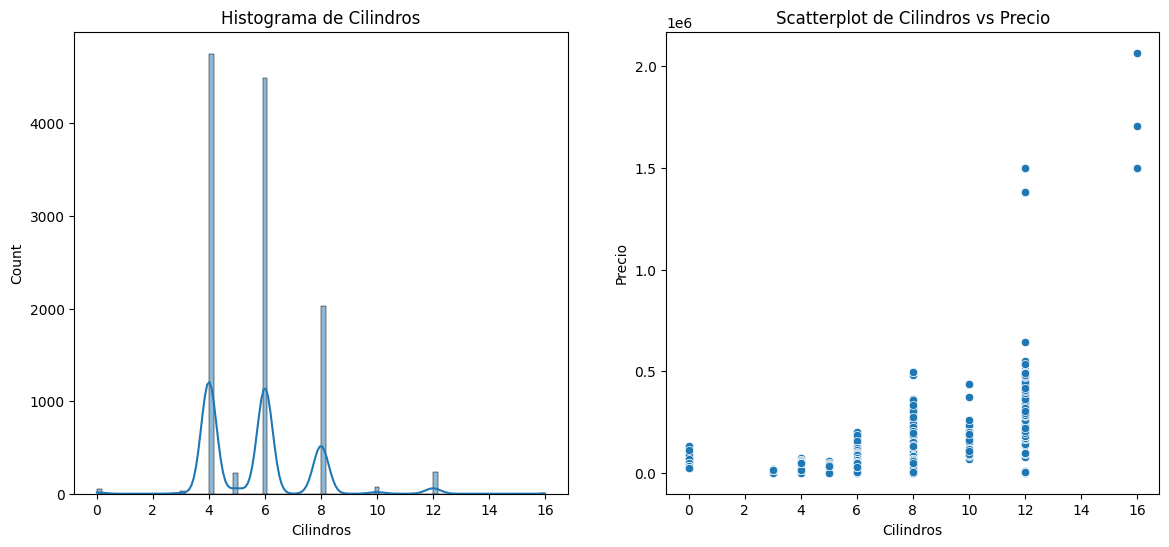

Variable: Puertas
Media: 3.4360933825999327, Mínimo: 2.0, Máximo: 4.0, Mediana: 4.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Futur

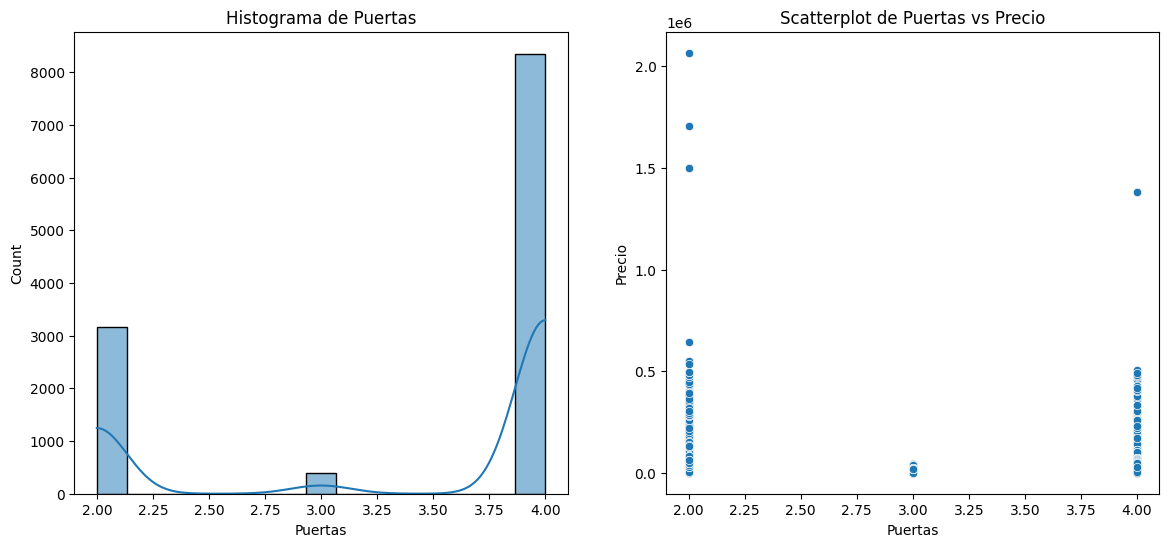

Variable: Consumo Carretera
Media: 26.637485311398354, Mínimo: 12.0, Máximo: 354.0, Mediana: 26.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Futur

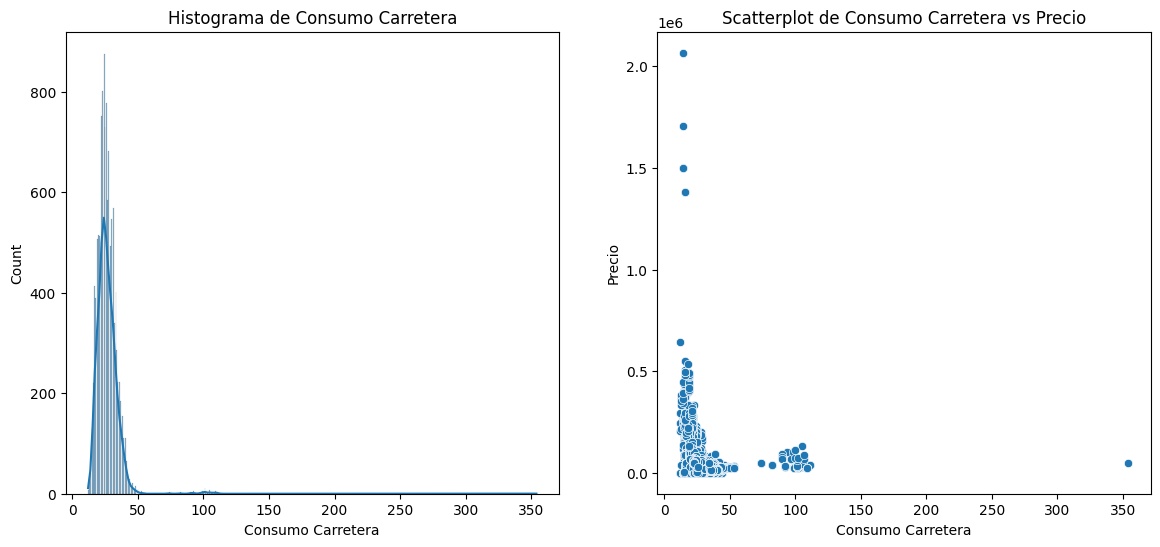

Variable: Consumo Ciudad
Media: 19.73325499412456, Mínimo: 7.0, Máximo: 137.0, Mediana: 18.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Futur

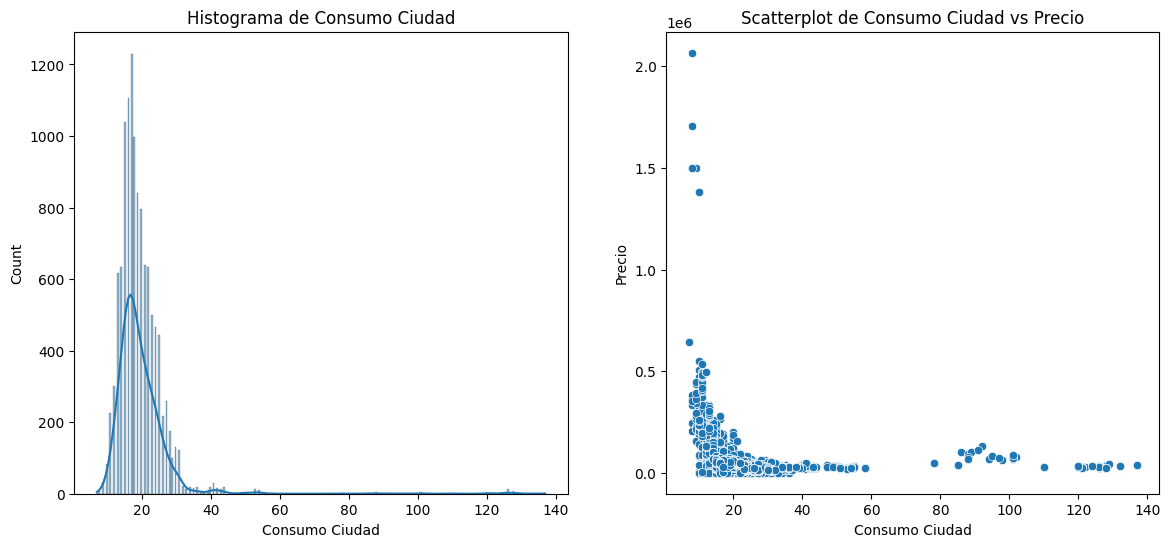

Variable: Popularidad
Media: 1554.9111969111968, Mínimo: 2, Máximo: 5657, Mediana: 1385.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Futur

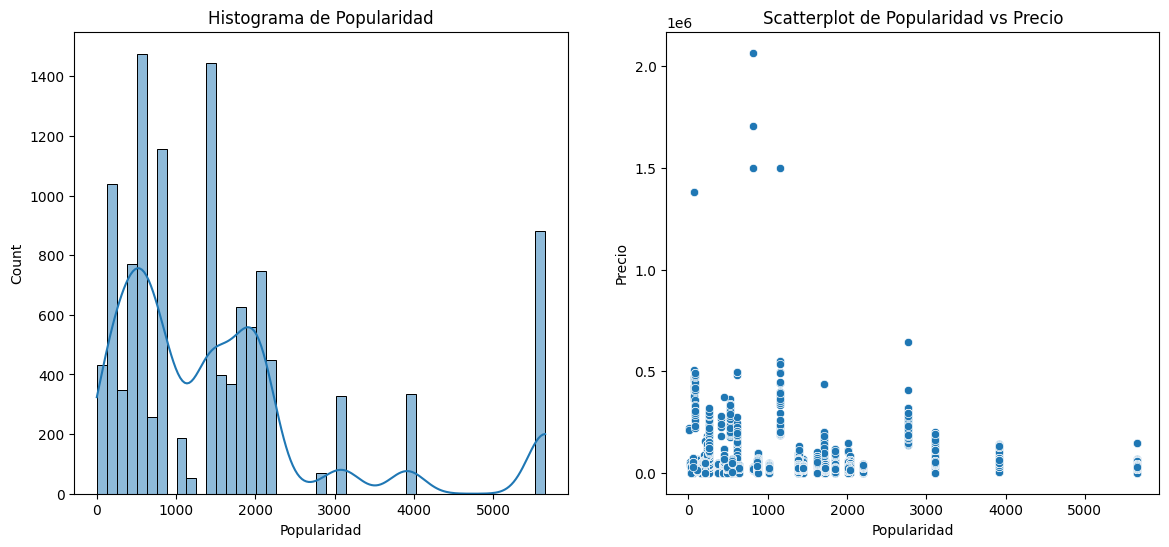

Variable: Precio
Media: 40594.737032063116, Mínimo: 2000.0, Máximo: 2065902.0, Mediana: 29995.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Futur

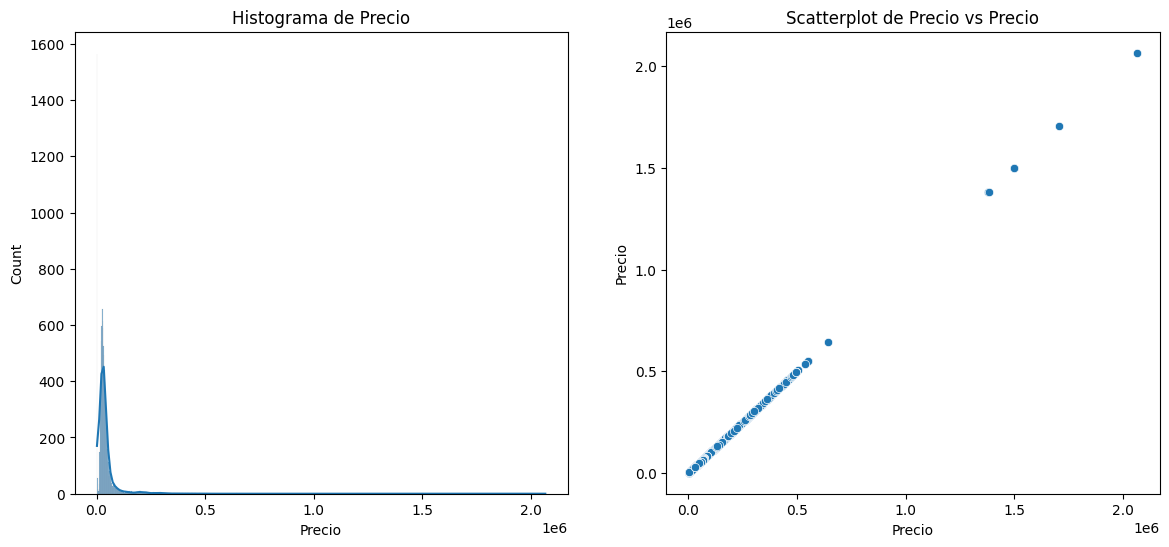

In [3]:
# Dividimos las variables en cualitativas y cuantitativas
variables_cualitativas = df.select_dtypes(include=['object'])
variables_cuantitativas = df.select_dtypes(include=['int64', 'float64'])

# Análisis de variables cualitativas
for column in variables_cualitativas:
    num_classes = len(df[column].unique())
    print(f"Variable: {column}, Número de clases: {num_classes}")
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f"Distribucion de valores para {column}")
    plt.show()

# Análisis de variables cuantitativas
for column in variables_cuantitativas:
    mean_val = df[column].mean()
    min_val = df[column].min()
    max_val = df[column].max()
    median_val = df[column].median()
    print(f"Variable: {column}")
    print(f"Media: {mean_val}, Mínimo: {min_val}, Máximo: {max_val}, Mediana: {median_val}")
    
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f"Histograma de {column}")

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=column, y='Precio', data=df)
    plt.title(f"Scatterplot de {column} vs Precio")
    plt.show()


**Análisis Multivariante**

                                     year        CV  Cilindros   Puertas  \
year                             1.000000  0.337445  -0.026711  0.245974   
CV                               0.337445  1.000000   0.788187 -0.128624   
Cilindros                       -0.026711  0.788187   1.000000 -0.147553   
Puertas                          0.245974 -0.128624  -0.147553  1.000000   
Consumo Carretera                0.265607 -0.423646  -0.614706  0.116884   
...                                   ...       ...        ...       ...   
Estilo_Regular Cab Pickup       -0.125201 -0.050514   0.031919 -0.297078   
Estilo_Sedan                     0.020542 -0.052468  -0.111749  0.365808   
Estilo_Wagon                    -0.057618 -0.107133  -0.105470  0.144384   
Precio_de_segunda_mano_estimado  0.216931  0.680837   0.571402 -0.147982   
Precio_de_segunda_mano_ajustado  0.216931  0.680837   0.571402 -0.147982   

                                 Consumo Carretera  Consumo Ciudad  \
year             

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


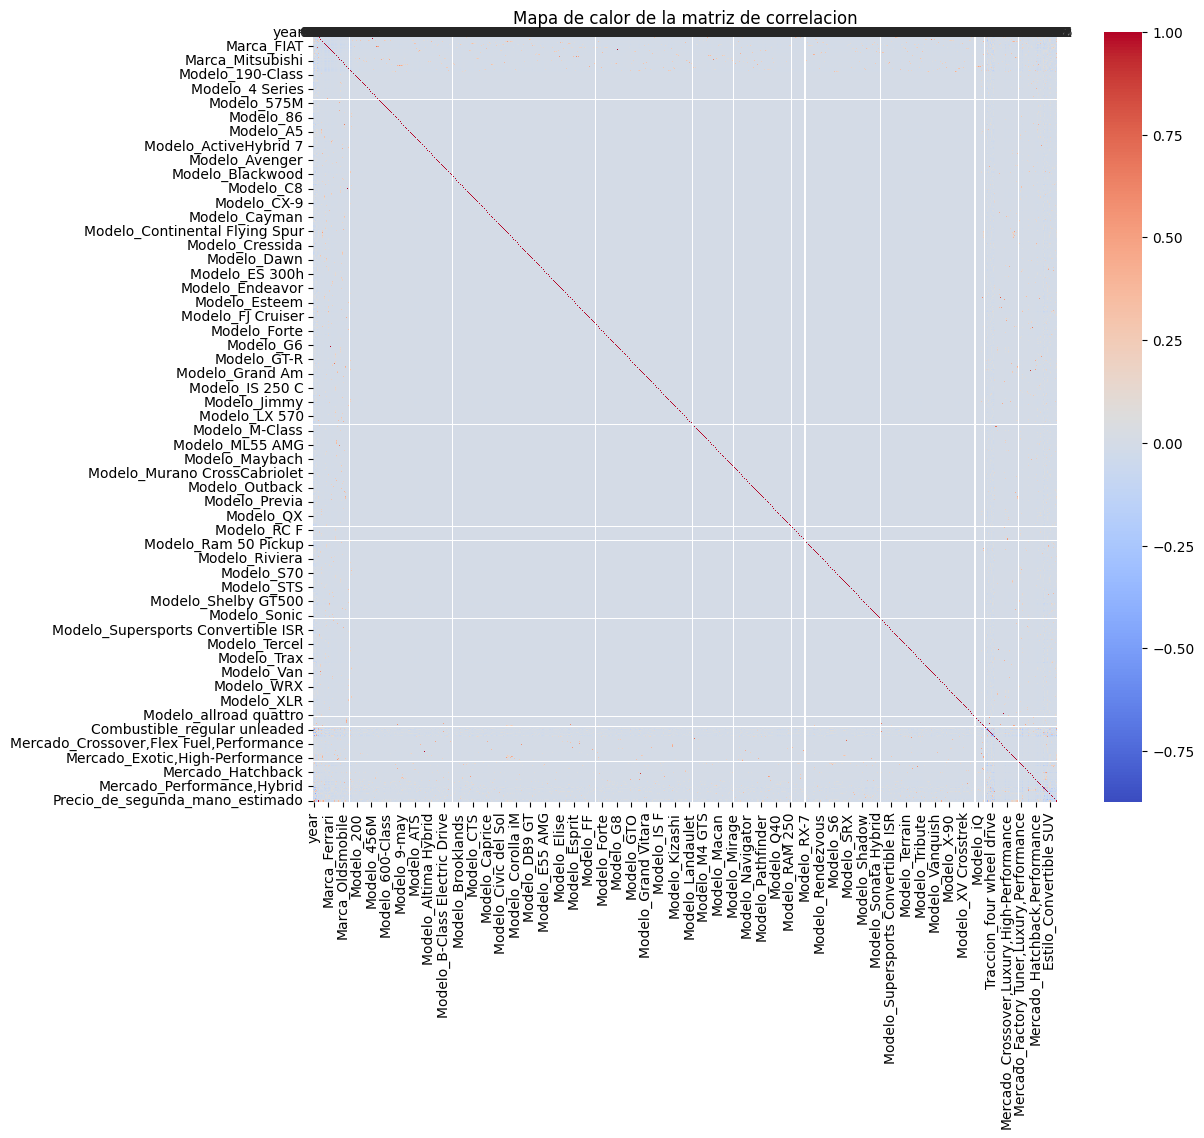

In [11]:
"""
Para realizar un análisis multivariante se usará una matriz de correlación y un HeatMap
- Matriz de correlación: Tabla que muestra las correlaciones entre todas las variables en
un dataset
Las correlaciones comprenden (-1, 1) donde -1 indica correlación negativa perfecta, 1 indica 
correlación positiva perfecta y 0 ausencia de correlación. Gracias a esto se odentifican 
patrones y relaciones en el conjunto de datos
- HeatMap: Mapa de calor o representación gráfica de datos en la que los valores de una matriz 
se representan como colores.
Colores más oscuros implican correlaciones más fuertes, y colores tenues indican ausencia 
de correlación o correlación débil.
Los HeatMaps proporcionan una representación visual efectiva en el análisis multivariante.
"""
# Calculamos la matriz de correlacion
df = pd.get_dummies(df)
corr_matrix = df.corr()
print(corr_matrix)
# Creamos un HeatMap de la matriz de correlación
plt.figure(figsize = (12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f') 
# Annot en True para mostrar valores de matriz en celdas correspondientes
# fmt = '.2f' indica valores con dos decimales flotantes
plt.title('Mapa de calor de la matriz de correlacion')
plt.show()

**Análisis de calidad del dato**

year                          0
CV                           69
Cilindros                    30
Puertas                       6
Consumo Carretera             0
                             ..
Estilo_Passenger Minivan      0
Estilo_Passenger Van          0
Estilo_Regular Cab Pickup     0
Estilo_Sedan                  0
Estilo_Wagon                  0
Length: 1080, dtype: int64
year                 661
CV                   509
Cilindros            357
Puertas                0
Consumo Carretera    192
Consumo Ciudad       316
Popularidad          881
Precio               996
dtype: int64


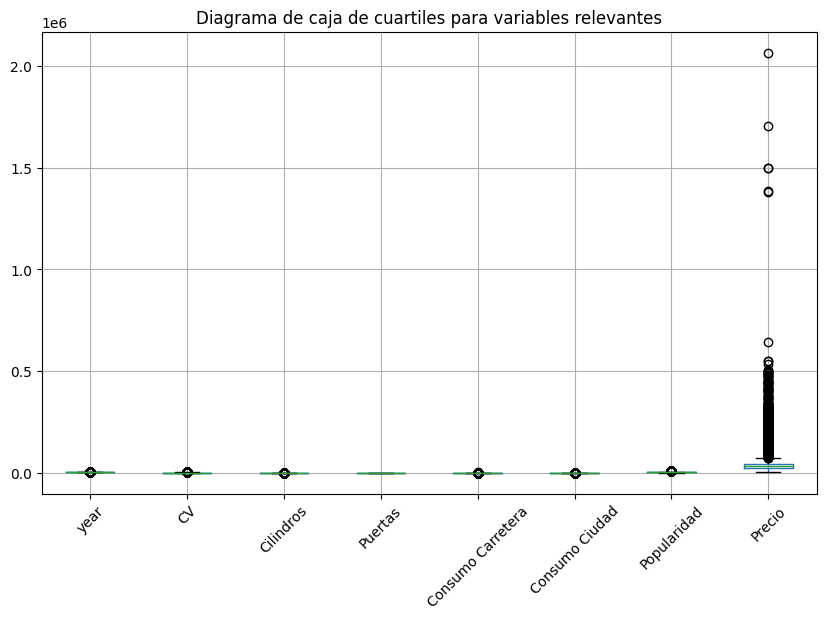

In [5]:
# Verifica la presencia de valores nulos
print(df.isnull().sum())
# Identificamos valores atípicos
Q1 = variables_cuantitativas.quantile(0.25)
Q3 = variables_cuantitativas.quantile(0.75)
IQR = (Q3 - Q1)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Alineamos el DataFrame con los límites
df_aligned, lower_bound_aligned = df.align(lower_bound, axis=1, join='inner')
df_aligned, upper_bound_aligned = df.align(upper_bound, axis=1, join='inner')

# Identificamos valores atípicos
outliers = ((df_aligned < lower_bound_aligned) | (df_aligned > upper_bound_aligned)).sum()
print(outliers)
# Seleccionamos columnas relevantes
columnas_relevantes = ['year', 'CV', 'Cilindros', 'Puertas',
             'Consumo Carretera', 'Consumo Ciudad', 'Popularidad', 'Precio']

# Creamos gráficos de caja para los cuartiles
plt.figure(figsize=(10, 6))
df[columnas_relevantes].boxplot()
plt.title('Diagrama de caja de cuartiles para variables relevantes')
plt.xticks(rotation=45)
plt.show()



**Preparación del Dataset**

In [6]:
# Eliminación de valores nulos
df = df.dropna()

# Eliminación de valores duplicados
df = df.drop_duplicates()

# Normalización de la variable "Popularidad" utilizando MinMaxScaler
scaler = MinMaxScaler()
df['Popularidad'] = scaler.fit_transform(df['Popularidad'].values.reshape(-1, 1))
print(df)

       year     CV  Cilindros  Puertas  Consumo Carretera  Consumo Ciudad  \
0      2011  335.0        6.0      2.0               26.0            19.0   
1      2011  300.0        6.0      2.0               28.0            19.0   
2      2011  300.0        6.0      2.0               28.0            20.0   
3      2011  230.0        6.0      2.0               28.0            18.0   
4      2011  230.0        6.0      2.0               28.0            18.0   
...     ...    ...        ...      ...                ...             ...   
11909  2012  300.0        6.0      4.0               23.0            16.0   
11910  2012  300.0        6.0      4.0               23.0            16.0   
11911  2012  300.0        6.0      4.0               23.0            16.0   
11912  2013  300.0        6.0      4.0               23.0            16.0   
11913  2006  221.0        6.0      4.0               26.0            17.0   

       Popularidad   Precio  Marca_Acura  Marca_Alfa Romeo  ...  \
0       

**Desarrollo y evaluación del modelo**

***Regresión Lineal Múltiple***

Error Cuadrático Medio (MSE): 0.0008
Coeficiente de determinación (R2): 0.3960


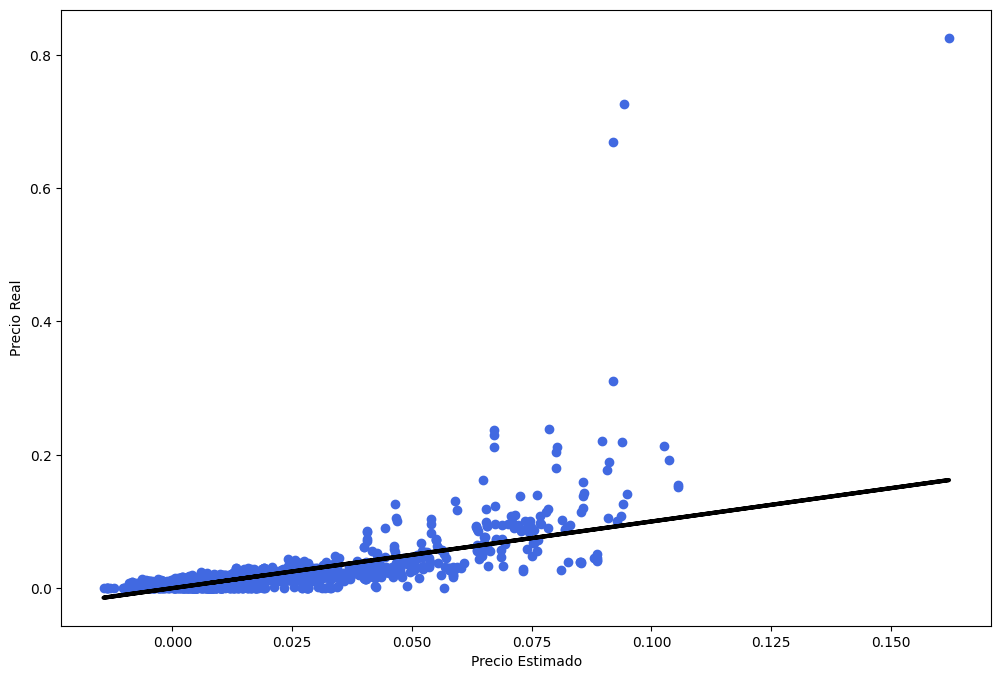

In [7]:
# Definimos las columnas predictoras y la columna objetivo
x_cols = ['year', 'CV', 'Cilindros', 'Consumo Carretera', 'Consumo Ciudad', 'Popularidad']
y_col = 'Precio'

# Normalizamos las variables para una mejor interpretación
scaler = MinMaxScaler()
x = scaler.fit_transform(df[x_cols])
y = scaler.fit_transform(df[y_col].values.reshape(-1, 1))
# Se convierte a un array 2D antes de normalizar

# Generamos el conjunto de entrenamiento y prueba 
# (test size 0.2 implica que 20% de datos para pruebas y 80% para entrenamiento)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Entrenamos el modelo de regresión lineal
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = reg.predict(x_test)

# Calculamos métricas de evaluación
print(f"Error Cuadrático Medio (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Coeficiente de determinación (R2): {r2_score(y_test, y_pred):.4f}")

# Visualizamos los resultados
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(y_pred, y_test, color='royalblue')
plt.plot(y_pred, y_pred, color='black', linewidth=3)

plt.xlabel('Precio Estimado')
plt.ylabel('Precio Real')
plt.show()

***Regularizaciones Ridge y Lasso***

In [8]:
# Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

print(f"Error cuadrático medio (MSE) para Ridge: {mean_squared_error(y_test, y_pred_ridge):.4f}")
print(f"Coeficiente de determinación (R2) para Ridge: {r2_score(y_test, y_pred_ridge):.4f}")

# Lasso 
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)  # Selecciona un valor apropiado para alpha
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

print(f"Error cuadrático medio (MSE) para Lasso: {mean_squared_error(y_test, y_pred_lasso):.4f}")
print(f"Coeficiente de determinación (R2) para Lasso: {r2_score(y_test, y_pred_lasso):.4f}")


Error cuadrático medio (MSE) para Ridge: 0.0008
Coeficiente de determinación (R2) para Ridge: 0.3958


Error cuadrático medio (MSE) para Lasso: 0.0013
Coeficiente de determinación (R2) para Lasso: -0.0010


**Predicción de precio de segunda mano para cada vehículo del conjunto de datos**

      Precio  Precio_de_segunda_mano_estimado  Precio_de_segunda_mano_ajustado
0    46135.0                     50654.916667                     35458.441667
1    40650.0                     41432.300000                     29002.610000
2    36350.0                     38295.300000                     26806.710000
3    29450.0                     32112.658333                     22478.860833
4    34500.0                     32112.658333                     22478.860833
..       ...                              ...                              ...
103   4107.0                      4306.797000                      3014.757900
104   2000.0                      2000.000000                      1400.000000
105   2000.0                      2017.941667                      1412.559167
106   2000.0                      2000.000000                      1400.000000
107   2000.0                      2000.000000                      1400.000000

[100 rows x 3 columns]


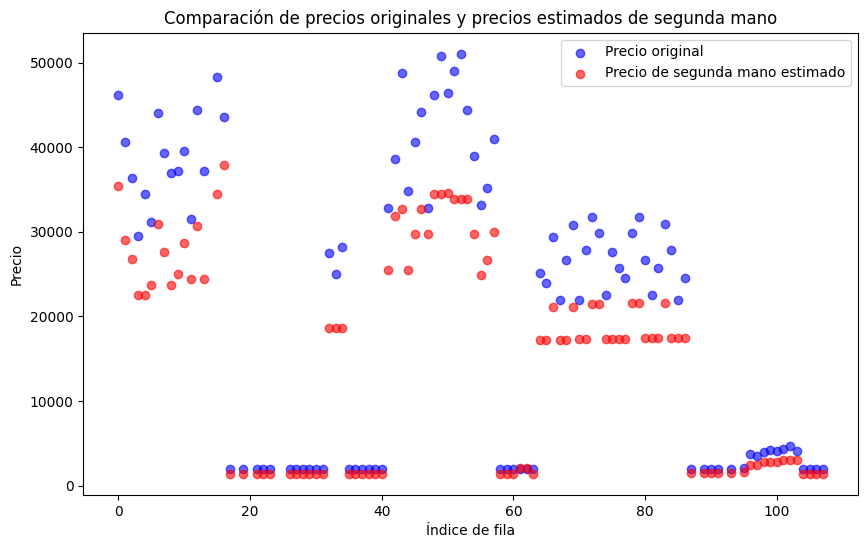

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Definir las columnas predictoras y la columna objetivo
x_cols = ['year', 'CV', 'Cilindros', 'Consumo Carretera', 'Consumo Ciudad', 'Popularidad']
y_col = 'Precio'

# Crear y entrenar el modelo de RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(df[x_cols], df[y_col])

# Ajustar el precio estimado de segunda mano considerando el descuento
porcentaje_descuento = 0.7  # 30% de descuento
df['Precio_de_segunda_mano_estimado'] = rf_model.predict(df[x_cols])
df['Precio_de_segunda_mano_ajustado'] = df['Precio_de_segunda_mano_estimado'] * porcentaje_descuento

# Visualizar los resultados
print(df[['Precio', 'Precio_de_segunda_mano_estimado', 'Precio_de_segunda_mano_ajustado']].head(100))

# Crear gráfico de dispersión para comparar los precios originales y los precios estimados de segunda mano
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df.index[:100], df['Precio'].head(100), label='Precio original', color='b', alpha=0.6)
ax.scatter(df.index[:100], df['Precio_de_segunda_mano_ajustado'].head(100), label='Precio de segunda mano estimado', color='r', alpha=0.6)
ax.set_xlabel('Índice de fila')
ax.set_ylabel('Precio')
ax.set_title('Comparación de precios originales y precios estimados de segunda mano')
ax.legend()
plt.show()